In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [3]:
df = pd.read_csv('SBAnational.csv')
df

/tmp/ipykernel_11633/3498453600.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [4]:
df['ApprovalDate'].sort_values().unique()

array(['1-Apr-02', '1-Apr-03', '1-Apr-04', ..., '9-Sep-97', '9-Sep-98',
       '9-Sep-99'], shape=(9859,), dtype=object)

In [5]:
df['ApprovalDate'].sort_values().unique()

array(['1-Apr-02', '1-Apr-03', '1-Apr-04', ..., '9-Sep-97', '9-Sep-98',
       '9-Sep-99'], shape=(9859,), dtype=object)

In [5]:
# le nombre de banques 

len(df['Bank'].unique())

5803

In [6]:
# nombre d'états des banques qui sont étudiées

len(df['BankState'].unique())

57

In [7]:
# LE nombre de secteurs d'activité

len(df['NAICS'].astype(str).str.slice(0,2).unique())

25

In [8]:
# nb états des clients

len(df['State'].unique())

52

In [9]:
df['RetainedJob'].unique()

array([   0,    7,   23,    4,    6,    1,    9,   20,    2,    5,   19,
          8,    3,   10,   24,   12,   15,   11,   25,   44,   17,   14,
         65,   28,   38,   16,   42,   26,   18,   13,   50,   93,   40,
         37,   60,   21,   30,   31,   34,   35,  150,   22,   73,   41,
         45,  100,  180,   58,   75,  165,   36,  130,   29,   27,  125,
         99,   46,   32,  257,   43,   47,   80,   70,   54,   62,   33,
         39,  400,   55,   95,   48,  120,   71,   63,   81,   52,   94,
         78,  160,  109,   86,   77,  155,   85,   90,   64, 3225,   61,
         69,   66,  210,  107,   97,   51,   83,  112,   53,   72,   76,
         87,   68,  118,  138,   67,   57,   56,  117,  171,  229,  115,
        275,  153,  300,  105,  140,  135,   59,   79,  200,  295,  205,
        206,  128,  186,  137,  250,   89,   49,  131,   92,  404,  110,
        320,  139,   82,  108,   88,  104,  114,  134,  230,  102,  103,
         96,   98,   84,  101,  220,  233,   74,  2

In [10]:
df.nunique()

LoanNr_ChkDgt        899164
Name                 779583
City                  32581
State                    51
Zip                   33611
Bank                   5802
BankState                56
NAICS                  1312
ApprovalDate           9859
ApprovalFY               70
Term                    412
NoEmp                   599
NewExist                  3
CreateJob               246
RetainedJob             358
FranchiseCode          2768
UrbanRural                3
RevLineCr                18
LowDoc                    8
ChgOffDate             6448
DisbursementDate       8472
DisbursementGross    118859
BalanceGross             15
MIS_Status                2
ChgOffPrinGr          83165
GrAppv                22128
SBA_Appv              38326
dtype: int64

In [11]:
df.duplicated()[df.duplicated() == True]

Series([], dtype: bool)

In [12]:
df


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,cat_activites,SBA_loan_float,bank_loan_float


In [68]:
df_2 = df.copy()

#Création de la colonne categorie activité
df_2['cat_activites'] = df['NAICS'].map(lambda x: str(x)[:2])

#Remplace les années avec 1976A par 1976 et passage en INT

df_2.replace('1976A',1976, inplace= True)
df_2['ApprovalFY'] = pd.to_numeric(df_2['ApprovalFY'])

# supprime le dollar et formate
df_2['SBA_loan_float'] = df_2['SBA_Appv'].map(lambda x : float(x[1:].replace(',','')))
df_2['bank_loan_float'] = df_2['GrAppv'].map(lambda x : float(x[1:].replace(',','')))


# Nettoyage de la colonne lowdoc le programme a été créé en 1993 avec les condtions d'être en dessous de 150000 dollars de prêt
df_2['LowDoc'] = df_2.apply(
    lambda row: row['LowDoc'] if row['LowDoc'] in ['Y', 'N']
    else ('N' if row['ApprovalFY'] < 1993 else ('N' if row['bank_loan_float'] > 150000 else 'Y')), axis=1)


# Formatage et de nettoyage de la colonne Approuval Date
# Modifier les années en fonction de la condition
df_2['ApprovalDate'] = df_2['ApprovalDate'].map(
    lambda x: x.replace(x[-3:], '-19' + x[-2:]) if int(x[-2:]) >= 50 else x.replace(x[-3:], '-20' + x[-2:])
)
df_2['ApprovalDate'] = pd.to_datetime(df_2['ApprovalDate'])

#Impute la valeur MIS_Status selon la valeur ChgOffDate (S'il y a une date de défaut, c'est que le prêt n'a pas été remboursé dans son entierté.)
df_2.loc[df_2["MIS_Status"].isna(), "MIS_Status"] = df_2["ChgOffDate"].notna().map({True: "CHGOFF", False: "P I F"})

# retirer les null dans state



# df_2.dtypes



In [43]:
df_2['bank_loan_float'].describe()

count    8.981300e+05
mean     1.925382e+05
std      2.831830e+05
min      2.000000e+02
25%      3.500000e+04
50%      9.000000e+04
75%      2.250000e+05
max      5.472000e+06
Name: bank_loan_float, dtype: float64

In [46]:
for c in df_2.columns:
    print('pour la colonne', c,'il y a :')
    print(df_2[c].isna().sum())

pour la colonne LoanNr_ChkDgt il y a :
0
pour la colonne Name il y a :
14
pour la colonne City il y a :
30
pour la colonne State il y a :
13
pour la colonne Zip il y a :
0
pour la colonne Bank il y a :
1557
pour la colonne BankState il y a :
1564
pour la colonne NAICS il y a :
0
pour la colonne ApprovalDate il y a :
0
pour la colonne ApprovalFY il y a :
0
pour la colonne Term il y a :
0
pour la colonne NoEmp il y a :
0
pour la colonne NewExist il y a :
136
pour la colonne CreateJob il y a :
0
pour la colonne RetainedJob il y a :
0
pour la colonne FranchiseCode il y a :
0
pour la colonne UrbanRural il y a :
0
pour la colonne RevLineCr il y a :
4525
pour la colonne LowDoc il y a :
0
pour la colonne ChgOffDate il y a :
735504
pour la colonne DisbursementDate il y a :
2361
pour la colonne DisbursementGross il y a :
0
pour la colonne BalanceGross il y a :
0
pour la colonne MIS_Status il y a :
0
pour la colonne ChgOffPrinGr il y a :
0
pour la colonne GrAppv il y a :
0
pour la colonne SBA_App

In [61]:
pd.set_option('display.max_columns', None)
df_2
#df_2['ApprovalDate'][df_2['NewExist'].sort_values().isna()]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,cat_activites,SBA_loan_float,bank_loan_float,dif_days_aproved_received,ratio_SBA_bank
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",45,48000.0,60000.0,730 days,0.80
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",72,32000.0,40000.0,92 days,0.80
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",62,215250.0,287000.0,306 days,0.75
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00",0,28000.0,35000.0,122 days,0.80
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00",0,229000.0,229000.0,75 days,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00",45,56000.0,70000.0,215 days,0.80
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00",45,42500.0,85000.0,246 days,0.50
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00",33,225000.0,300000.0,215 days,0.75
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00",0,60000.0,75000.0,32 days,0.80


In [69]:
df_newE = df_2['NewExist'].astype('category')
df_mis = df_2['MIS_Status'].astype('category')
contingency_table = pd.crosstab(df_newE, df_mis)
contingency_table

MIS_Status,CHGOFF,P I F
NewExist,,
0.0,69,965
1.0,110295,534574
2.0,47441,205684


In [16]:
df_2[df_2['NAICS'] == 0]

#200K plus lignes qui ont un NAICS qui est de 0

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,cat_activites,SBA_loan_float,bank_loan_float
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00",0,28000.0,35000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00",0,229000.0,229000.0
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,1980-06-02,1980,...,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00",0,499998.0,600000.0
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,1997-02-28,1997,...,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00",0,56000.0,70000.0
13,1000154010,"ORCHARD CAFE & BAKERY, INC.",SLATERSVILLE,RI,2876,CITIZENS BANK NATL ASSOC,RI,0,1997-02-28,1997,...,31-May-97,"$370,000.00",$0.00,P I F,$0.00,"$370,000.00","$277,500.00",0,277500.0,370000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899153,9995413002,NORTH SHORE FLORAL,WOODBURY,NY,11797,FLUSHING BANK,NY,0,1997-02-27,1997,...,31-May-97,"$142,000.00",$0.00,CHGOFF,$0.00,"$142,000.00","$106,500.00",0,106500.0,142000.0
899154,9995423005,"LITWIN LIVERY SERVICES, INC.",CAMPBELL,OH,44405,JPMORGAN CHASE BANK NATL ASSOC,IL,0,1997-02-27,1997,...,30-Sep-97,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00",0,5000.0,10000.0
899158,9995563001,SHADES WINDOW TINTING AUTO ALA,IRVING,TX,75062,LOANS FROM OLD CLOSED LENDERS,DC,0,1997-02-27,1997,...,30-Jun-97,"$79,000.00",$0.00,P I F,$0.00,"$79,000.00","$63,200.00",0,63200.0,79000.0
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,...,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00",0,60000.0,75000.0


In [17]:
from datetime import datetime

df_2['dif_days_aproved_received'] = pd.to_datetime(df_2['DisbursementDate']) - pd.to_datetime(df_2['ApprovalDate'])

df_2

/tmp/ipykernel_11633/984317455.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2['dif_days_aproved_received'] = pd.to_datetime(df_2['DisbursementDate']) - pd.to_datetime(df_2['ApprovalDate'])


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,cat_activites,SBA_loan_float,bank_loan_float,dif_days_aproved_received
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",45,48000.0,60000.0,730 days
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",72,32000.0,40000.0,92 days
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",62,215250.0,287000.0,306 days
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00",0,28000.0,35000.0,122 days
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00",0,229000.0,229000.0,75 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,...,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00",45,56000.0,70000.0,215 days
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,...,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00",45,42500.0,85000.0,246 days
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,...,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00",33,225000.0,300000.0,215 days
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,...,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00",0,60000.0,75000.0,32 days


In [18]:

df_2['ratio_SBA_bank'] = df_2['SBA_Appv'].map(lambda x : float(x[1:].replace(',',''))) / df_2['GrAppv'].map(lambda x : float(x[1:].replace(',','')))
df_2

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,cat_activites,SBA_loan_float,bank_loan_float,dif_days_aproved_received,ratio_SBA_bank
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,$0.00,P I F,$0.00,"$60,000.00","$48,000.00",45,48000.0,60000.0,730 days,0.80
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,$0.00,P I F,$0.00,"$40,000.00","$32,000.00",72,32000.0,40000.0,92 days,0.80
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,$0.00,P I F,$0.00,"$287,000.00","$215,250.00",62,215250.0,287000.0,306 days,0.75
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,$0.00,P I F,$0.00,"$35,000.00","$28,000.00",0,28000.0,35000.0,122 days,0.80
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,$0.00,P I F,$0.00,"$229,000.00","$229,000.00",0,229000.0,229000.0,75 days,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,...,$0.00,P I F,$0.00,"$70,000.00","$56,000.00",45,56000.0,70000.0,215 days,0.80
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,...,$0.00,P I F,$0.00,"$85,000.00","$42,500.00",45,42500.0,85000.0,246 days,0.50
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,...,$0.00,P I F,$0.00,"$300,000.00","$225,000.00",33,225000.0,300000.0,215 days,0.75
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,...,$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00",0,60000.0,75000.0,32 days,0.80


In [19]:
# Suppression des lignes où le NewExist est égale à 0

df_2 = df_2[df_2['NewExist'] != 0]

In [20]:
#NB EST LA TABLE D'un group by entre mis status et newexist au final la donnée sur newexiste n'est pas pertinente

nb_mis = df_2.groupby(['MIS_Status', 'NewExist'])['NewExist'].count().reset_index(name='count')


nb_mis['ratio'] = nb_mis.apply(lambda row: 
                               row['count'] / nb_mis[nb_mis['MIS_Status'] == 'CHGOFF']['count'].sum() 
                               if row['MIS_Status'] == 'CHGOFF' 
                               else row['count'] / nb_mis[nb_mis['MIS_Status'] == 'P I F']['count'].sum(), 
                               axis=1)

nb_mis

,MIS_Status,NewExist,count,ratio
0,CHGOFF,1.0,110295,0.699238
1,CHGOFF,2.0,47441,0.300762
2,P I F,1.0,533332,0.722159
3,P I F,2.0,205192,0.277841
4,PIF,1.0,1242,0.001682
5,PIF,2.0,492,0.000666


In [21]:
df_2['MIS_Status'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
899159    False
899160    False
899161    False
899162    False
899163    False
Name: MIS_Status, Length: 898130, dtype: bool

In [22]:
len(df_2['Zip'].astype(str).str[:2].unique())

100

In [23]:
pd.to_numeric(df_2['ApprovalFY'][df_2['ApprovalFY'] != '1976A']).sort_values().unique()



array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014])

In [24]:
df_2.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'cat_activites', 'SBA_loan_float', 'bank_loan_float',
       'dif_days_aproved_received', 'ratio_SBA_bank'],
      dtype='object')

In [25]:
df_2_annee_MIS = df_2[['ApprovalFY', 'MIS_Status']]


df_2_annee_MIS_group = df_2_annee_MIS.groupby(['ApprovalFY','MIS_Status']).size()

df_2_annee_MIS_group_df = pd.DataFrame(df_2_annee_MIS_group).reset_index()
df_2_annee_MIS_group_df.columns = ['years', 'status','nb']
# Définir les intervalles de gravité des crises économiques
bins = [1968, 1972, 1979, 1991, 1997, 2002, 2008, 2014]
labels = ['Faible', 'Modéré', 'Moins grave', 'Modéré', 'Grave', 'Faible', 'Très grave']

# Appliquer pd.cut() pour classer les années selon les intervalles
df_2_annee_MIS_group_df['Crise Économique'] = pd.cut(df_2_annee_MIS_group_df['years'], bins=bins, labels=labels, right=False, ordered=False)

pd.set_option('display.max_rows', 120)
df_2_annee_MIS_group_df.head(118)

,years,status,nb,Crise Économique
0,1969,P I F,1,Faible
1,1970,CHGOFF,7,Faible
2,1970,P I F,1,Faible
3,1971,CHGOFF,20,Faible
4,1972,CHGOFF,23,Modéré
5,1972,P I F,4,Modéré
6,1973,CHGOFF,47,Modéré
7,1973,P I F,4,Modéré
8,1973,PIF,1,Modéré
9,1974,CHGOFF,40,Modéré


<Axes: xlabel='years', ylabel='nb'>

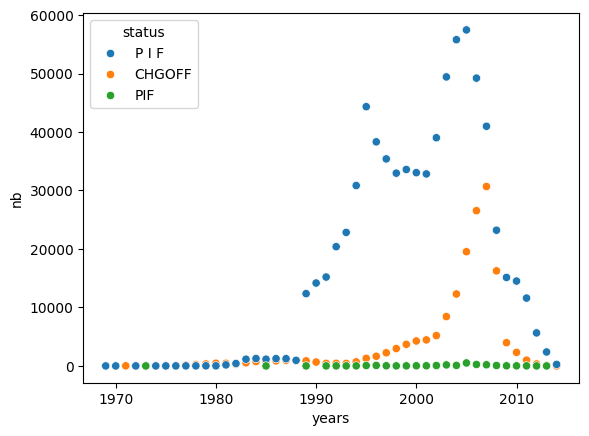

In [26]:
sns.scatterplot(x = "years", 
                y = "nb", 
                data = df_2_annee_MIS_group_df, 
                hue = "status")

<Axes: xlabel='years', ylabel='total_loan_bank'>

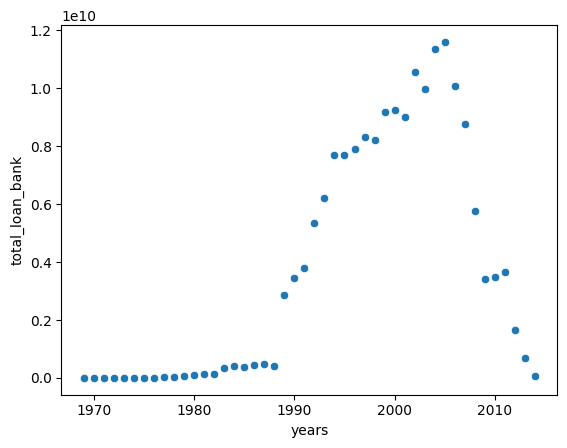

In [27]:
df_2_sum_years = df_2.groupby('ApprovalFY')['bank_loan_float'].sum()


df_2_sum_years = pd.DataFrame(df_2_sum_years).reset_index()
df_2_sum_years.columns = ['years', 'total_loan_bank']

sns.scatterplot(x = "years", 
                y = "total_loan_bank", 
                data = df_2_sum_years, 
                #hue = "status"
                )



<Axes: xlabel='years', ylabel='total_loan_SBA'>

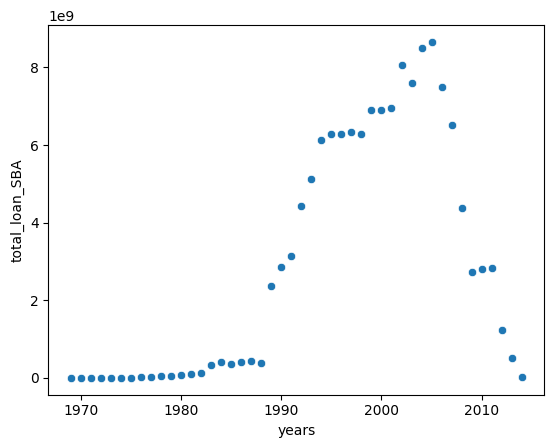

In [28]:
df_2_sum_years = df_2.groupby('ApprovalFY')['SBA_loan_float'].sum()


df_2_sum_years = pd.DataFrame(df_2_sum_years).reset_index()
df_2_sum_years.columns = ['years', 'total_loan_SBA']

sns.scatterplot(x = "years", 
                y = "total_loan_SBA", 
                data = df_2_sum_years, 
                #hue = "status"
                )


<Axes: xlabel='years', ylabel='nb_ApprovalFY'>

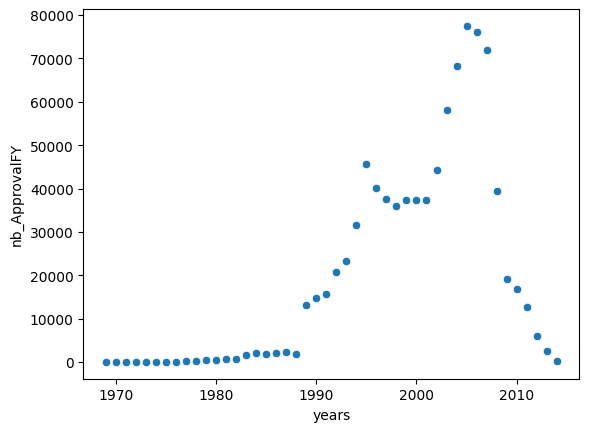

In [29]:
df_2_sum_years = df_2.groupby('ApprovalFY')['SBA_loan_float'].count()


df_2_sum_years = pd.DataFrame(df_2_sum_years).reset_index()
df_2_sum_years.columns = ['years', 'nb_ApprovalFY']

sns.scatterplot(x = "years", 
                y = "nb_ApprovalFY", 
                data = df_2_sum_years, 
                #hue = "status"
                )


### Sur l'augmentation des crédits fin des années 80

Consolidation des prêts garantis par le gouvernement : Les programmes de prêts garantis par la Small Business Administration (SBA) ont été renforcés dans les années 1980. Ces programmes permettaient de réduire les risques pour les prêteurs privés, rendant ainsi les crédits plus accessibles aux petites entreprises, même si elles étaient jugées plus risquées par les institutions financières.

### Baisse des prêts après la crise des subprimes 

2. Renforcement des régulations bancaires (loi Dodd-Frank) :

Après la crise financière de 2008, le gouvernement américain a mis en place de nouvelles régulations pour stabiliser le système financier et éviter de futures crises. La loi Dodd-Frank (2010) a notamment imposé des exigences strictes en matière de capital, de liquidité et de transparence pour les banques. Ces nouvelles régulations ont accru la charge administrative et le coût de l'octroi de crédits pour les banques, les incitant à se concentrer davantage sur des prêts jugés moins risqués et plus rentables. Les petites entreprises, souvent perçues comme plus vulnérables, ont donc eu plus de mal à obtenir des financements.

In [30]:
df_2['LowDoc'][(df_2['LowDoc'] != 'Y') & (df_2['LowDoc']!= 'N')].unique()

array([], dtype=object)

In [31]:
df_2['LowDoc'] = df_2['LowDoc'].apply(lambda x : x if x == 'Y' or x == 'N' else 'N' if x['ApprovalFY'] <= 1993 else 'N' if x['bank_loan_float']> 150000 else 'Y')

df_2['LowDoc'].unique()

/tmp/ipykernel_11633/721854825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['LowDoc'] = df_2['LowDoc'].apply(lambda x : x if x == 'Y' or x == 'N' else 'N' if x['ApprovalFY'] <= 1993 else 'N' if x['bank_loan_float']> 150000 else 'Y')


array(['Y', 'N'], dtype=object)

In [66]:
# Assurez-vous que les colonnes 'Lowdoc' et 'MIS_Status' sont de type catégoriel
low_d= df_2['LowDoc'].astype('category')
status_d= df_2['MIS_Status'].astype('category')

# Créez un tableau de contingence entre les deux variables
contingency_table = pd.crosstab(low_d, status_d)

In [67]:
contingency_table

MIS_Status,CHGOFF,P I F,P I F\t
LowDoc,,,
N,146551,636927,1582
Y,11268,102682,154


In [34]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Statistique Chi-2:", chi2)
print("Degrés de liberté:", dof)
print("P-value:", p)
print("Tableau des valeurs attendues :\n", expected)

Statistique Chi-2: 5368.158949330574
Degrés de liberté: 2
P-value: 0.0
Tableau des valeurs attendues :
 [[1.37730418e+05 6.44904893e+05 1.51568942e+03]
 [2.00195821e+04 9.37391073e+04 2.20310583e+02]]


In [85]:
df_var = df_2['State'].astype('category')
df_var

0         IN
1         IN
2         IN
3         OK
4         FL
          ..
899159    OH
899160    OH
899161    CA
899162    HI
899163    HI
Name: State, Length: 899164, dtype: category
Categories (51, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']

In [84]:
df_2_chi2 = df_2[['State', 'NAICS','UrbanRural','LowDoc','Bank','RevLineCr','FranchiseCode','NewExist','MIS_Status']]

for column in df_2_chi2.columns:
    df_var = df_2_chi2[column].astype('category')
    df_cible = df_2_chi2['MIS_Status'].astype('category')
    contingency_table = pd.crosstab(df_var, df_cible)
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    p_crit = stats.chi2.ppf(0.95, dof)
    print(f'le résultat pour {column}')
    print("Statistique Chi-2:", chi2)
    print("Degrés de liberté:", dof)
    print("valeur critique:", p_crit)

    print("P-value:", p)
    print("Tableau des valeurs attendues :\n", expected)
    print('')
    print('================================================================================')

le résultat pour State
Statistique Chi-2: 11185.983155485148
Degrés de liberté: 50
valeur critique: 67.5048065495412
P-value: 0.0
Tableau des valeurs attendues :
 [[   422.11808931   1982.88191069]
 [  1467.6721259    6894.3278741 ]
 [  1112.95251738   5228.04748262]
 [  3094.53805928  14536.46194072]
 [ 22925.83896347 107693.16103653]
 [  3616.52525163  16988.47474837]
 [  2146.39588945  10082.60411055]
 [   283.10872268   1329.89127732]
 [   389.64746705   1830.35253295]
 [  7233.40153701  33978.59846299]
 [  3909.98947006  18367.01052994]
 [   633.61592615   2976.38407385]
 [  2105.5004571    9890.4995429 ]
 [  1667.05929823   7830.94070177]
 [  5207.41022521  24461.58977479]
 [  2480.40450648  11651.59549352]
 [  2012.12547851   9451.87452149]
 [  1355.51684146   6367.48315854]
 [  1680.74961464   7895.25038536]
 [  4435.66251682  20836.33748318]
 [  2328.93344158  10940.06655842]
 [  1043.27231719   4900.72768281]
 [  3605.994239    16939.005761  ]
 [  4277.87284435  20095.1271556

### Variables significatives 

toutes les variables vues au dessus sont significatives


In [37]:
df_2.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'cat_activites', 'SBA_loan_float', 'bank_loan_float',
       'dif_days_aproved_received', 'ratio_SBA_bank'],
      dtype='object')

In [75]:
df_loan_mis = pd.crosstab(df_2['bank_loan_float'],df_mis)
df_loan_mis

MIS_Status,CHGOFF,P I F
bank_loan_float,,
200.0,0,2
300.0,1,0
400.0,0,2
500.0,2,31
700.0,0,4
...,...,...
4908500.0,0,1
4950000.0,0,1
4991700.0,0,1


In [76]:

print(stat_anova)
print(p_value)

33.01463779657416
9.206619245765622e-09


In [77]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [83]:
df_2_anova = df_2[['CreateJob', 'RetainedJob','DisbursementGross','BalanceGross','GrAppv','SBA_Appv','MIS_Status']]

for column in df_2_anova.columns:
    df_cible = df_2_anova['MIS_Status'].astype('category')
    contingency_table = pd.crosstab(df[column],df_cible )
    stat_anova, p_value = stats.f_oneway(contingency_table['CHGOFF'],contingency_table['P I F'])

    print(f'le résultat pour {column}')
    print("Statistique f:", stat_anova)
    # print("Degrés de liberté:", dof)
    # print("valeur critique:", p_crit)

    print("P-value:", p_value)
    # print("Tableau des valeurs attendues :\n", expected)
    print('')
    print('================================================================================')

MIS_Status  CHGOFF   P I F
CreateJob                 
0            98816  530432
1            18908   44266
2            15485   42346
3             6707   22099
4             4202   16309
...            ...     ...
3500             0       1
5085             0       1
5199             0       1
5621             0       1
8800           229     419

[246 rows x 2 columns]
le résultat pour CreateJob
Statistique f: 1.15131954474116
P-value: 0.28380123397877166

MIS_Status   CHGOFF   P I F
RetainedJob                
0             42412  397991
1             26530   62260
2             21230   55621
3             14329   35634
4             11168   28498
...             ...     ...
4441              1       0
5000              0       1
7250              0       1
8800            229     419
9500              0       1

[358 rows x 2 columns]
le résultat pour RetainedJob
Statistique f: 1.98657136834766
P-value: 0.15913523031102245

MIS_Status         CHGOFF  P I F
DisbursementGross       